In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
file_name = 'bml_5run.xlsx'

In [ ]:
data = pd.read_excel(file_name, engine='openpyxl',sheet_name='10_Gates_run1')

In [ ]:
data.head(5)

,base,values
0,./g_buffer/100ps/0p1nm/ncfet_g_buffer_0.3,NaN
1,T_RISE,0.0
2,T_FALL,0.0
3,T_DELAY,0.0
4,./g_buffer/100ps/0p1nm/ncfet_g_buffer_0.4,NaN


In [ ]:
param_strs = data[data.base.map(lambda x: len(x) > 10)].base.values
param_strs[:2]

array(['./g_buffer/100ps/0p1nm/ncfet_g_buffer_0.3',
       './g_buffer/100ps/0p1nm/ncfet_g_buffer_0.4'], dtype=object)

In [ ]:
trise_vals = data[data.base == 'T_RISE ']['values'].values
tfall_vals = data[data.base == 'T_FALL ']['values'].values
tdelay_vals = data[data.base == 'T_DELAY ']['values'].values
len(trise_vals) == len(tfall_vals) == len(tdelay_vals) == len(param_strs)

True

In [ ]:
trise_vals

array([3.131324e-12, 8.473565e-13, 5.938628e-13, ..., ' FAILED',
       ' FAILED', ' FAILED'], dtype=object)

In [ ]:
param_strs[0].split(sep='/')

['.', 'g_buffer', '100ps', '0p1nm', 'ncfet_g_buffer_0.3']

It goes - [1] gate name, [2] clock cylce, [3] thickness, [4] voltage --> after some parsing

In [ ]:
gate_types = pd.Series(param_strs).map(lambda x: x.split('/')).map(lambda x: x[1][2:])

In [ ]:
clock_cycle = pd.Series(map(lambda x: x.split(sep='/')[2][:-2], param_strs))
thickness = pd.Series(map(lambda x: x.split(sep='/')[3][:-2], param_strs))
clock_cycle[0], thickness_str[0]

('100', '0p1')

In [ ]:
#how to remove the pesky 'p' value in the thickness
#thickness[0].replace('p', '.')

In [ ]:
thickness = thickness.map(lambda x: x.replace('p', '.'))
thickness[:2]

0    0.1
1    0.1
dtype: object

In [ ]:
voltage = pd.Series(map(lambda x: x.split('/')[-1].split('_')[-1], param_strs))

In [ ]:
sample_clean_df = pd.DataFrame({'gate_types' : gate_types,
                        'voltage':voltage, 'thickness':thickness, 'clock_cycle': clock_cycle,
                        't_rise': trise_vals, 't_fall': tfall_vals, 't_delay': tdelay_vals})
sample_clean_df.tail(2)

,gate_types,voltage,thickness,clock_cycle,t_rise,t_fall,t_delay
11338,nor4,0.8,9,900,FAILED,0.0,0.0
11339,nor4,0.9,9,900,FAILED,0.0,0.0


In [ ]:
def get_clean_df(df):
    param_strs = df[df.base.map(lambda x: len(x) > 10)].base.values
    gate_types = pd.Series(param_strs).map(lambda x: x.split('/')).map(lambda x: x[1][2:])
    trise_vals = df[df.base == 'T_RISE ']['values'].values
    tfall_vals = df[df.base == 'T_FALL ']['values'].values
    tdelay_vals = df[df.base == 'T_DELAY ']['values'].values
    clock_cycle = pd.Series(map(lambda x: x.split(sep='/')[2][:-2], param_strs))
    thickness = pd.Series(map(lambda x: x.split(sep='/')[3][:-2], param_strs))
    thickness = thickness.map(lambda x: x.replace('p', '.'))
    voltage = pd.Series(map(lambda x: x.split('/')[-1].split('_')[-1], param_strs))
    #pdb.set_trace()
    return pd.DataFrame({'type' : gate_types,
            'voltage':voltage, 'thickness':thickness, 'clock_cycle': clock_cycle,
            't_rise': trise_vals, 't_fall': tfall_vals, 't_delay': tdelay_vals})

In [ ]:
sheet_name_base = '10_Gates_run'
sheet_names = [sheet_name_base + str(x) for x in range(1,6)]
sheet_names

['10_Gates_run1',
 '10_Gates_run2',
 '10_Gates_run3',
 '10_Gates_run4',
 '10_Gates_run5']

In [ ]:
def read_sheet(sheet_name): return pd.read_excel(file_name, sheet_name, engine='openpyxl')

In [ ]:
run5 = read_sheet(sheet_names[-1])
run5.head(4)

,base,values
0,./g_buffer/100ps/0p1nm/ncfet_g_buffer_0.3,NaN
1,T_RISE,0.0
2,T_FALL,0.0
3,T_DELAY,0.0


In [ ]:
#run4 = read_sheet(sheet_names[-2])
run4[run1_len:].tail().values

array([['T_DELAY ', 1.736532e-11],
       ['./g_nor4/900ps/9nm/ncfet_g_nor4_0.9.sp.mt0', nan],
       ['T_RISE ', ' FAILED'],
       ['T_FALL ', 8.520112e-12],
       ['T_DELAY ', 1.743491e-11]], dtype=object)

In [ ]:
run1_df = get_clean_df(read_sheet(sheet_names[0])).rename(columns={"type":"gate_type"})
run2_df = get_clean_df(read_sheet(sheet_names[1])).rename(columns={"type":"gate_type"})
run3_df = get_clean_df(read_sheet(sheet_names[2])).rename(columns={"type":"gate_type"})
run4_df = get_clean_df(read_sheet(sheet_names[3])).rename(columns={"type":"gate_type"})
run5_df = get_clean_df(read_sheet(sheet_names[4])).rename(columns={"type":"gate_type"})
run1_df.shape, run2_df.shape, run3_df.shape, run4_df.shape, run5_df.shape

((11340, 7), (22680, 7), (34020, 7), (34020, 7), (34020, 7))

In [ ]:
run1_df.to_csv('run1.csv', index=False)
run2_df[:run1_len].to_csv('run2.csv', index=False)
run3_df[:run1_len].to_csv('run3.csv', index=False)
run4_df[:run1_len].to_csv('run4.csv', index=False)
run5_df[:run1_len].to_csv('run5.csv', index=False)

In [ ]:
run1_df.head(1)

,gate_type,voltage,thickness,clock_cycle,t_rise,t_fall,t_delay
0,buffer,0.3,0.1,100,0.0,0.0,0.0


In [ ]:
run1_df.tail().t_delay.values

array([1.495985e-11, 1.638343e-11, 1.708075e-11, 1.736532e-11,
       1.743491e-11], dtype=object)

### FAILED

Lets make sense of the number of FAILED values in the runs

In [ ]:
def get_failed(df, row_type='t_delay'):
    failed = (df[row_type] == ' FAILED').sum()
    return failed, f'{row_type}: {failed/len(df) * 100: .2f}%'
def get_full_fail(df):
    time_vals = ['t_delay', 't_rise', 't_fall']
    return [get_failed(df, t_val) for t_val in time_vals]

In [ ]:
#get_failed(run1_df, 't_fall'), get_failed(run1_df, 't_rise'), get_failed(run1_df, 't_delay')

In [ ]:
run1_df[run1_df.t_fall == ' FAILED'].head(2)

,gate_type,voltage,thickness,clock_cycle,t_rise,t_fall,t_delay
126,buffer,0.3,0.1,200,0.0,FAILED,0.0
127,buffer,0.4,0.1,200,0.0,FAILED,0.0


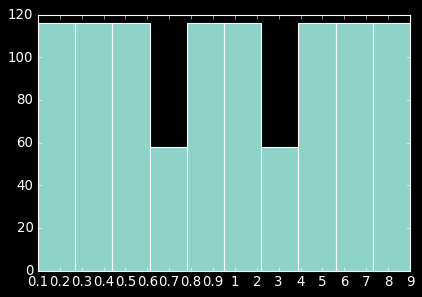

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(run1_df[run1_df.t_fall == ' FAILED'].thickness);

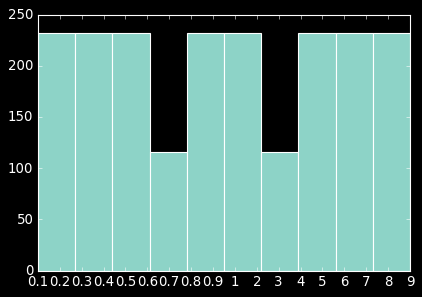

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(run2_df[run2_df.t_fall == ' FAILED'].thickness);

In [ ]:
get_full_fail(run1_df)

[(0, 't_delay:  0.00%'), (9072, 't_rise:  80.00%'), (1044, 't_fall:  9.21%')]

In [ ]:
get_full_fail(run2_df)

[(0, 't_delay:  0.00%'), (18144, 't_rise:  80.00%'), (2088, 't_fall:  9.21%')]

In [ ]:
get_full_fail(run3_df)

[(0, 't_delay:  0.00%'), (27216, 't_rise:  80.00%'), (3132, 't_fall:  9.21%')]

In [ ]:
get_full_fail(run4_df)

[(0, 't_delay:  0.00%'), (27216, 't_rise:  80.00%'), (3132, 't_fall:  9.21%')]

In [ ]:
get_full_fail(run5_df)

[(0, 't_delay:  0.00%'), (27216, 't_rise:  80.00%'), (3132, 't_fall:  9.21%')]

## Why are the sheets(runs) showing different number of rows?

They seem to featuring redundant (useless?) information. Runs 3-5 are 3 times as long as run 1. Run 2 is twice as numerous as run 1. Maybe an issue with the compilation of the data??

In [ ]:
run1_df.tail()

,gate_type,voltage,thickness,clock_cycle,t_rise,t_fall,t_delay
11335,nor4,0.5,9,900,FAILED,0.0,0.0
11336,nor4,0.6,9,900,FAILED,0.0,0.0
11337,nor4,0.7,9,900,FAILED,0.0,0.0
11338,nor4,0.8,9,900,FAILED,0.0,0.0
11339,nor4,0.9,9,900,FAILED,0.0,0.0


In [ ]:
run2_df.tail()

,gate_type,voltage,thickness,clock_cycle,t_rise,t_fall,t_delay
22675,NaN,0.5.sp.mt0,9,900,FAILED,0.0,0.0
22676,NaN,0.6.sp.mt0,9,900,FAILED,0.0,0.0
22677,NaN,0.7.sp.mt0,9,900,FAILED,0.0,0.0
22678,NaN,0.8.sp.mt0,9,900,FAILED,0.0,0.0
22679,NaN,0.9.sp.mt0,9,900,FAILED,0.0,0.0


In [ ]:
#why are all three runs featuring a different number of samples????
run3_df.shape[0] / run1_df.shape[0], run2_df.shape[0] / run1_df.shape[0]

(3.0, 2.0)

In [ ]:
run1_df.shape, run2_df.shape, run3_df.shape

((11340, 7), (22680, 7), (34020, 7))

In [ ]:
run2_df.tail(2)

,type,voltage,thickness,clock_cycle,t_rise,t_fall,t_delay
22678,NaN,0.8.sp.mt0,9,900,FAILED,0.0,0.0
22679,NaN,0.9.sp.mt0,9,900,FAILED,0.0,0.0


In [ ]:
run4_df.tail(2)

,type,voltage,thickness,clock_cycle,t_rise,t_fall,t_delay
34018,NaN,0.8.sp.mt0,9,900,FAILED,0.0,0.0
34019,NaN,0.9.sp.mt0,9,900,FAILED,0.0,0.0


Looks like (potentially) useless rows beyond the number of rows of the first sheet???

In [ ]:
run1_len = run1_df.shape[0]
run1_len

11340

In [ ]:
run4_df[run1_len:].head(2)

,type,voltage,thickness,clock_cycle,t_rise,t_fall,t_delay
11340,NaN,0.3.sp.mt0,0.1,100,0.0,0.0,0.0
11341,NaN,0.4.sp.mt0,0.1,100,0.0,0.0,0.0


In [ ]:
#just to confirm the redundant rows are equal in their column values
run4_df[run1_len: run1_len*2].tail().t_delay.values == \
run4_df[run1_len*2: run1_len*3].tail().t_delay.values

array([ True,  True,  True,  True,  True])

In [ ]:
run1_len * 4

45360

Based on the the number of row discrepency described and the redundant looking data -- as seen when looking at the bottom of the longer sheets -- let's only compare the first X rows of each dataframe (sheet). Can parameterize the function so that it can consider different ways of determining how different one row is vs the other (i.e. total different values or percent difference between the elementwise values?)

In [ ]:
def get_cols(df1, df2, col_name='t_delay'):
    one_col = df1[:run1_len][col_name].values
    two_col = df2[:run1_len][col_name].values
    return one_col, two_col

In [ ]:
col_name = 't_delay'
one_col, two_col = get_cols(run1_df, run2_df)

In [ ]:
def plot_percent_diff(df1, df2, col_name='t_delay'):
    one_col, two_col = get_cols(df1, df2, col_name)
    plt.figure(figsize=(6,4))
    plt.hist((one_col - two_col) / two_col, color='red')
    plt.xlabel('percent_difference')
    plt.ylabel('number of samples')
    plt.title(col_name)

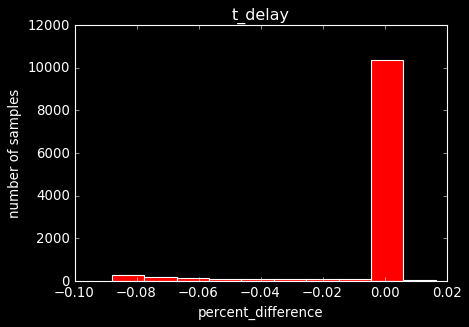

In [ ]:
plt.style.use('dark_background')
#plt.style.use('classic')
plot_percent_diff(run1_df, run2_df, 't_delay')
#plot_percent_diff(run1_df, run3_df, 't_delay')
#plot_percent_diff(run1_df, run4_df, 't_delay')
#plot_percent_diff(run1_df, run5_df, 't_delay')

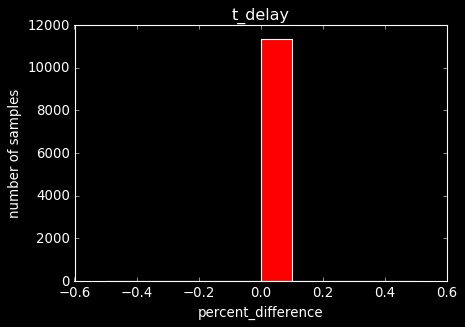

In [ ]:
plt.style.use('dark_background')
#plt.style.use('classic')
plot_percent_diff(run2_df, run3_df, 't_delay')
#plot_percent_diff(run2_df, run4_df, 't_delay')
#plot_percent_diff(run2_df, run5_df, 't_delay')

In [ ]:
plt.style.use('dark_background')
#plt.style.use('classic')
#plot_percent_diff(run3_df, run4_df, 't_delay')
#plot_percent_diff(run2_df, run5_df, 't_delay')

Can NOT run same comparison for other dependent variables bc of ' FAILED' values

No difference in the t_delay values between runs 2,3,4,5 --> only a discrepency between run 1 and the others

In [ ]:
def get_cols(df1, df2, col_name='t_delay'):
    one_col = df1[:run1_len][col_name].values
    two_col = df2[:run1_len][col_name].values
    return one_col, two_col

def compare_cols(col1, col2, comparison_op='total_diff'):
    if comparison_op == 'total_diff':
        return (col1 != col2).sum()

Cell below are just for explanation purposes to confirm for viewer how the compare function above works and provides the expected return values

In [ ]:
#same as above but with floating values
one = np.random.rand(1,5)
two = one.copy()
one!=two, (one!=two), (one!=two).sum(), one, two

(array([[False, False, False, False, False]]),
 array([[False, False, False, False, False]]),
 0,
 array([[0.38689781, 0.84598223, 0.85250428, 0.81437532, 0.83685416]]),
 array([[0.38689781, 0.84598223, 0.85250428, 0.81437532, 0.83685416]]))

In [ ]:
def compare_dfs(df1, df2):
    return compare_cols(*get_cols(df1, df2, col_name='t_delay')),\
           compare_cols(*get_cols(df1, df2, col_name='t_rise')), \
           compare_cols(*get_cols(df1, df2, col_name='t_fall')) 

In [ ]:
dfs_list = [run1_df, run2_df, run3_df, run4_df, run5_df]

In [ ]:
def compare_all_dfs(idx_df):
    base_df = dfs_list[idx_df]
    return [compare_dfs(base_df, df) for i,df in enumerate(dfs_list) if i != idx_df]

In [ ]:
compare_all_dfs(0), compare_all_dfs(1), compare_all_dfs(2), compare_all_dfs(3), compare_all_dfs(4)

([(1134, 126, 1134), (1134, 126, 1134), (1134, 126, 1134), (1134, 126, 1134)],
 [(1134, 126, 1134), (0, 0, 0), (0, 0, 0), (0, 0, 0)],
 [(1134, 126, 1134), (0, 0, 0), (0, 0, 0), (0, 0, 0)],
 [(1134, 126, 1134), (0, 0, 0), (0, 0, 0), (0, 0, 0)],
 [(1134, 126, 1134), (0, 0, 0), (0, 0, 0), (0, 0, 0)])

In [ ]:
run1_len

11340

So the first sheet is different than the others but all the others seem to be giving reliablely consistent results. [when compared to ONE ANOTHER] --> maybe not the case when compared to the older data (looked at below)

Code hidden below is the manual workflow through the function above that is more concise and improves the readability of notebook overall

In [ ]:
compare_dfs(run1_df, run2_df),\
compare_dfs(run1_df, run3_df), \
compare_dfs(run1_df, run4_df), \
compare_dfs(run1_df, run5_df),

((1134, 126, 1134), (1134, 126, 1134), (1134, 126, 1134), (1134, 126, 1134))

In [ ]:
compare_dfs(run2_df, run1_df),\
compare_dfs(run2_df, run3_df), \
compare_dfs(run2_df, run4_df), \
compare_dfs(run2_df, run5_df),

((1134, 126, 1134), (0, 0, 0), (0, 0, 0), (0, 0, 0))

In [ ]:
compare_dfs(run3_df, run1_df),\
compare_dfs(run3_df, run2_df), \
compare_dfs(run3_df, run4_df), \
compare_dfs(run3_df, run5_df),

((1134, 126, 1134), (0, 0, 0), (0, 0, 0), (0, 0, 0))

In [ ]:
compare_dfs(run4_df, run1_df),\
compare_dfs(run4_df, run2_df), \
compare_dfs(run4_df, run3_df), \
compare_dfs(run4_df, run5_df),

((1134, 126, 1134), (0, 0, 0), (0, 0, 0), (0, 0, 0))

Now lets get our old data and compare to the newly provided data

In [ ]:
old_df = pd.read_csv('final.csv')
old_df.shape

(7532, 7)

In [ ]:
old_df.head(1)

,type,clock_cycle,thickness tFE,Vdd,T_RISE,T_FALL,T_DELAY
0,ncfet_inverter,100ps,0nm,0.3,2.410636e-12,2.278608e-12,4.401267e-12


In [ ]:
old_df = old_df.rename(columns={"thickness tFE": "thickness", 
                                "Vdd": "voltage",
                                "type":"gate_type"})

In [ ]:
old_df.head(1)

,gate_type,clock_cycle,thickness,voltage,T_RISE,T_FALL,T_DELAY
0,ncfet_inverter,100ps,0nm,0.3,2.410636e-12,2.278608e-12,4.401267e-12


In [ ]:
old_df['clock_cycle'] = old_df.clock_cycle.map(lambda x: x[:-2])
old_df['thickness'] = old_df.thickness.map(lambda x: x[:-2])
old_df['gate_type'] = old_df.gate_type.map(lambda x: x.split('_')[-1])

In [ ]:
old_df.head(1)

,gate_type,clock_cycle,thickness,voltage,T_RISE,T_FALL,T_DELAY
0,inverter,100,0,0.3,2.410636e-12,2.278608e-12,4.401267e-12


In [ ]:
run1_df.head(1)

,type,voltage,thickness,clock_cycle,t_rise,t_fall,t_delay
0,buffer,0.3,0.1,100,0.0,0.0,0.0


In [ ]:
#what are all the possible unique gate types in our new runs???
run1_df.type.unique()

array(['buffer', 'inv_x1', 'inv_x2', 'inv_x4', 'nand2', 'nand3', 'nand4',
       'nor2', 'nor3', 'nor4'], dtype=object)

In [ ]:
#what about for our old data?
old_df.type.unique()

array(['inverter', 'buffer', 'nand', 'nor'], dtype=object)

Ok, so the new data has different gate types (additional ones) than the original data

In [ ]:
# ugly function but gets the job done
def index_df(df, gate_type='buffer', voltage='0.3', clock_cycle='100', thickness='0.1',
            gate_only=False):
    voltage, clock_cylce, thickness = str(voltage), str(clock_cycle), str(thickness)
    if gate_only: return df.loc[(df['gate_type'] == gate_type)]
    return df.loc[
                (df['gate_type'] == gate_type) & \
                (df['voltage'] == voltage) & \
                (df['clock_cycle'] == clock_cycle) & \
                (df['thickness'] == thickness) 
                ]

In [ ]:
base_params = list(old_df.iloc[0].index[:4])
base_params

['gate_type', 'clock_cycle', 'thickness', 'voltage']

Lets extract all our old gates into their own dataframes...

In [ ]:
#lets also drop irrelevant rows that have thickness values greater than we want
def drop_thick(df): return df[df.thickness.map(int) < 9.1].reset_index(drop=True)

In [ ]:
old_buffer_df = drop_thick(index_df(old_df, gate_only=True).reset_index(drop=True))
old_inverter_df = drop_thick(index_df(old_df, gate_only=True, gate_type='inverter').reset_index(drop=True))
old_nand_df = drop_thick(index_df(old_df, gate_only=True, gate_type='nand').reset_index(drop=True))
old_nor_df = drop_thick(index_df(old_df, gate_only=True, gate_type='nor').reset_index(drop=True))
old_buffer_df.shape, old_inverter_df.shape, old_nand_df.shape, old_nor_df.shape

((693, 7), (700, 7), (700, 7), (700, 7))

In [ ]:
#this is how we can get a specific row from the old dataframe
old_buffer_row = (old_buffer_df.iloc[10][base_params])
dict(old_buffer_row)

{'gate_type': 'buffer', 'clock_cycle': '100', 'thickness': '1', 'voltage': 0.6}

In [ ]:
def get_old_params(df, idx): return dict(df.iloc[idx][base_params])

In [ ]:
#some of the rows will NOT have corresponding values in new df
index_df(run1_df, **get_old_params(old_buffer_df, 0))

,gate_type,voltage,thickness,clock_cycle,t_rise,t_fall,t_delay


In [ ]:
index_df(run1_df, **get_old_params(old_buffer_df, 10))

,gate_type,voltage,thickness,clock_cycle,t_rise,t_fall,t_delay
66,buffer,0.6,1,100,0.0,0.0,0.0


Below is how 

In [ ]:
import pdb
def get_dependent(row): 
    if row.shape[0] == 1: 
        return row.values[0][-3:]
    elif row.shape[0] == 0: return [np.nan]*3
    else: return row.values[-3:]

In [ ]:
old_buffer_row = (old_buffer_df.iloc[10][base_params])
r1row = index_df(run1_df, **dict(old_buffer_row)) 
oldrow = get_dependent(old_buffer_df.iloc[10])
r1row = get_dependent(r1row)
r1row, oldrow

(array([5.413394e-13, 1.283254e-12, 6.067873e-12], dtype=object),
 array([1.128596e-12, 1.121133e-12, 3.518527e-12], dtype=object))

In [ ]:
def compare_rows(old_df, new_df, idx):
    old_df_row = old_df.iloc[idx]
    params = (old_df_row[base_params])
    new_dep_vals = get_dependent(index_df(new_df, **dict(params)))
    old_dep_vals = get_dependent(old_df_row)
    if np.nan not in new_dep_vals: new_dep_vals[new_dep_vals == ' FAILED'] = np.inf #to handle all the failed values
    #percent_diff = (new_dep_vals - old_dep_vals) / old_dep_vals
    return old_dep_vals, new_dep_vals#, percent_diff

In [ ]:
#output of an unmatching param row
compare_rows(old_buffer_df, run1_df, 0)

(array([3.045711e-12, 3.07417e-12, 9.658936e-12], dtype=object),
 [nan, nan, nan])

In [ ]:
#output with a failed value
compare_rows(old_buffer_df, run1_df, 500)

(array([2.616359e-12, 2.525918e-12, 7.565223e-12], dtype=object),
 array([1.796407e-12, inf, 2.475597e-11], dtype=object))

In [ ]:
#output with NO Failed value and matching params between datasets
compare_rows(old_buffer_df, run1_df, 10)

(array([1.128596e-12, 1.121133e-12, 3.518527e-12], dtype=object),
 array([5.413394e-13, 1.283254e-12, 6.067873e-12], dtype=object))

In [ ]:
np.hstack(compare_rows(old_buffer_df, run1_df, 10))

array([1.128596e-12, 1.121133e-12, 3.518527e-12, 5.413394e-13,
       1.283254e-12, 6.067873e-12], dtype=object)

In [ ]:
test_df = pd.DataFrame([np.hstack(compare_rows(old_buffer_df, run1_df, x)) for x in range(10)])
#test_df.iloc[:, 3:].tail(1) #this will get the new run values
test_df.head(1)

,0,1,2,3,4,5
0,3.045711e-12,3.074170e-12,9.658936e-12,NaN,NaN,NaN


In [ ]:
#pd.DataFrame([np.hstack(compare_rows(old_buffer_df, run1_df, x)) for x in range(len(old_buffer_df))])

In [ ]:
def get_failed(df, val): return (df[val] == ' FAILED').sum() / len(df)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
    
def plot_3_3d(df, name, save=False):
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(1, 3, 1, projection='3d')
    #plot_ax(df, 'tfall_fail', ax)
    plot_ax(df, 't_fall', ax)
    ax = fig.add_subplot(1, 3, 2, projection='3d')
    plot_ax(df, 't_rise', ax)
    ax = fig.add_subplot(1, 3, 3, projection='3d')    
    plot_ax(df, 't_delay', ax)
    fig.suptitle(name, fontsize=14, y=0.90)
    if save: fig.savefig(f'{name}.png')
    plt.show()

In [ ]:
def plot_ax(df, y_val, ax=None):
    if ax is None: 
        fig = plt.figure(figsize=plt.figaspect(0.5));
        ax = fig.add_subplot(1,1,1, projection='3d')
    xx = df.clock_cycle.map(lambda x: float(x))
    yy = df.thickness.map(lambda x: float(x))
    zz = df.voltage.map(lambda x: float(x))
    ys = df[f'{y_val}'] == ' FAILED'
    failed_pct = get_failed(df, y_val)
    ax.scatter(xx, yy, zz,  marker='o', c=ys , cmap='Reds', s=25)
    ax.set_xlabel('Clock cycle', fontsize=8)
    ax.set_ylabel('Thickness', fontsize=8, rotation = 0)
    ax.set_zlabel('Voltage', fontsize=8)
    ax.set_title(f'{y_val} fail %: {failed_pct:.2f}');

In [ ]:
def get_gate(df, gate_type='buffer'): return df[df.gate_type == gate_type].reset_index(drop=True)

In [ ]:
gate_types = run1_df.gate_type.unique()
gate_types

array(['buffer', 'inv_x1', 'inv_x2', 'inv_x4', 'nand2', 'nand3', 'nand4',
       'nor2', 'nor3', 'nor4'], dtype=object)

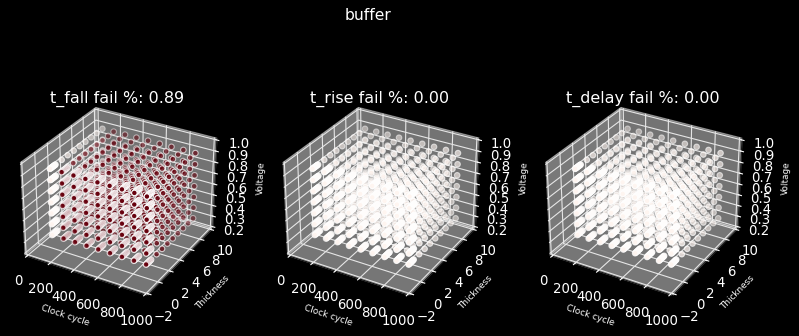

In [ ]:
plt.style.use('dark_background')
gate_type = gate_types[0]
plot_3_3d(get_gate(run1_df, gate_type), gate_type);

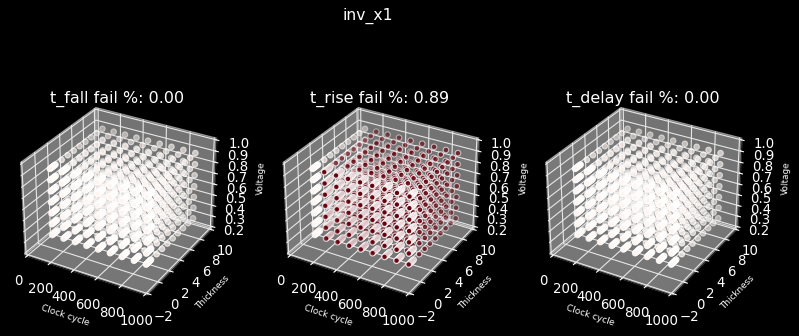

In [ ]:
gate_type = gate_types[1]
plot_3_3d(get_gate(run1_df, gate_type), gate_type);

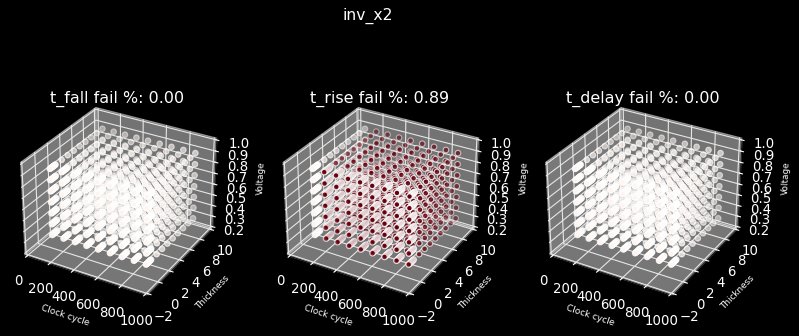

In [ ]:
gate_type = gate_types[2]
plot_3_3d(get_gate(run1_df, gate_type), gate_type);

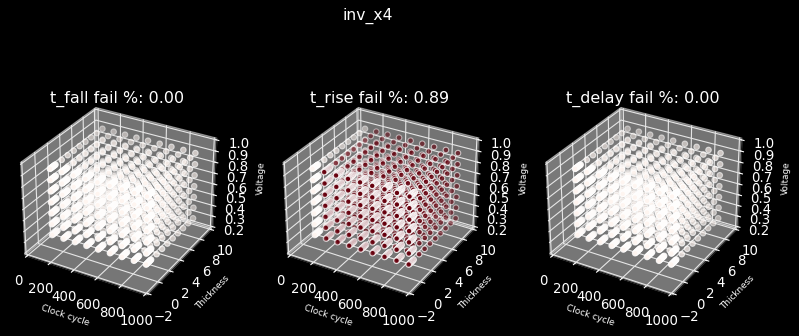

In [ ]:
gate_type = gate_types[3]
plot_3_3d(get_gate(run1_df, gate_type), gate_type);

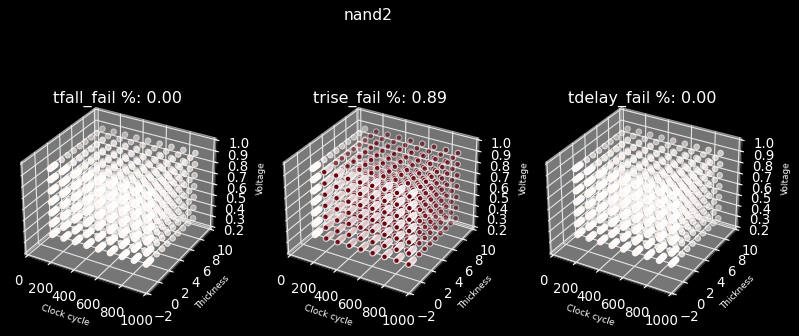

In [ ]:
gate_type = gate_types[4]
plot_3_3d(get_gate(run1_df, gate_type), gate_type);

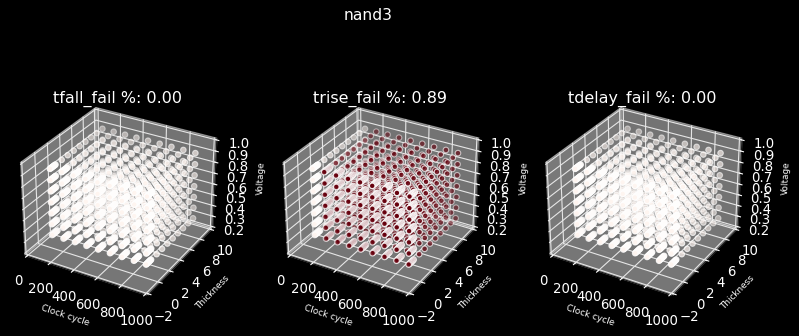

In [ ]:
gate_type = gate_types[5]
plot_3_3d(get_gate(run1_df, gate_type), gate_type);

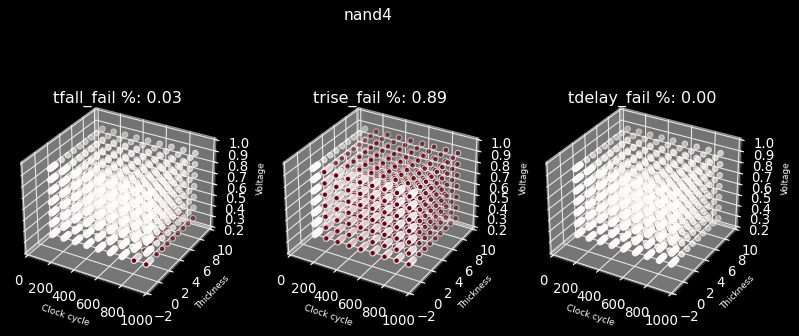

In [ ]:
gate_type = gate_types[6]
plot_3_3d(get_gate(run1_df, gate_type), gate_type);

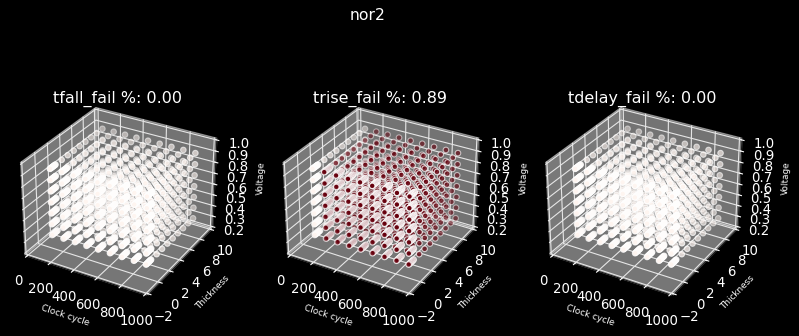

In [ ]:
gate_type = gate_types[7]
plot_3_3d(get_gate(run1_df, gate_type), gate_type);

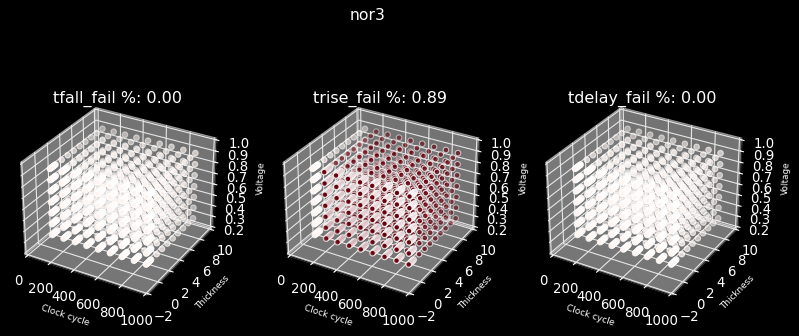

In [ ]:
gate_type = gate_types[8]
plot_3_3d(get_gate(run1_df, gate_type), gate_type);

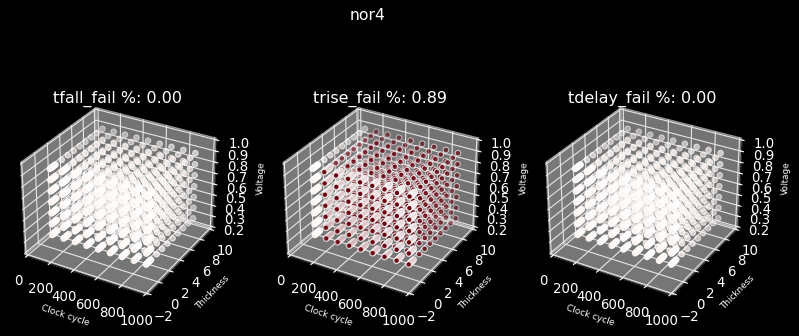

In [ ]:
gate_type = gate_types[9]
plot_3_3d(get_gate(run1_df, gate_type), gate_type);